In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist 

/Users/kimdoyeon/Projects/SchoolProjects/AI-Study/week4/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# 1. MNIST 데이터 로드 및 확인
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print("Training data shape:", train_X.shape)  # (60000, 28, 28)
print("Test data shape:", test_X.shape)      # (10000, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


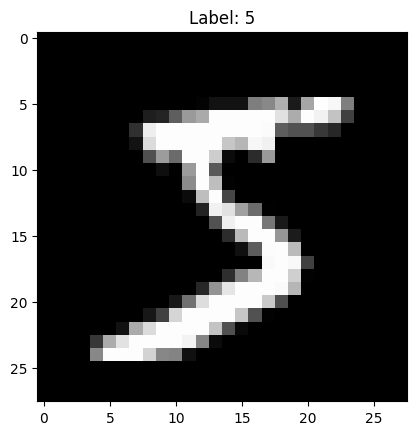

In [6]:
# 데이터 시각화 (첫 번째 이미지)
plt.imshow(train_X[0], cmap='gray')
plt.title(f"Label: {train_y[0]}")
plt.show()

In [7]:
# 2. 머신러닝 작업: SVM, DT, RF, LR, KNN
# (1) 데이터 전처리 - 1차원 벡터로 변환 및 정규화
train_X_flat = train_X.reshape(train_X.shape[0], -1) / 255.0
test_X_flat = test_X.reshape(test_X.shape[0], -1) / 255.0

# (2) 모델 정의 (일부 데이터로 학습)
models = {
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [8]:
# (3) 모든 머신러닝 모델 학습 및 평가 + Confusion Matrix
confusion_matrices = {}
print("\n=== 머신러닝 모델 ===")
for name, model in models.items():
    model.fit(train_X_flat[:10000], train_y[:10000])  # 10,000개 샘플로 학습
    predictions = model.predict(test_X_flat)
    accuracy = accuracy_score(test_y, predictions)
    cm = confusion_matrix(test_y, predictions)
    confusion_matrices[name] = cm
    print(f"{name} Test Accuracy: {accuracy:.4f}")


=== 머신러닝 모델 ===
SVM Test Accuracy: 0.9170
Decision Tree Test Accuracy: 0.8052
Random Forest Test Accuracy: 0.9497
Logistic Regression Test Accuracy: 0.9050
K-Nearest Neighbors Test Accuracy: 0.9442


In [9]:
# (4) Confusion Matrix 출력
print("\n=== 머신러닝 모델 Confusion Matrix ===")
for name, cm in confusion_matrices.items():
    print(f"\n** {name} **")
    print(cm)


=== 머신러닝 모델 Confusion Matrix ===

** SVM **
[[ 954    0    7    1    0    6    8    2    1    1]
 [   0 1121    1    2    0    2    3    1    5    0]
 [   8   11  930   13   11    4   13   11   29    2]
 [   3    2   28  914    2   20    2   10   21    8]
 [   2    1   12    0  927    0    6    6    2   26]
 [  12    6    6   60    7  754   15    1   26    5]
 [  12    3   12    1    9   12  906    0    2    1]
 [   3    8   24   15    9    0    0  943    5   21]
 [   7   18   10   31    9   32   11    6  840   10]
 [   8    8    1   15   46    6    1   37    6  881]]

** Decision Tree **
[[ 847    2   31   15    5   21   22    6   14   17]
 [   2 1055   17   20    1    4   13    5   14    4]
 [  21   20  788   35   17   19   34   36   42   20]
 [  28    7   27  768   15   67    9   19   46   24]
 [  11   12   16   19  767   24   21   21   35   56]
 [  29   11    8   56   19  671   25   10   41   22]
 [  22    6   20   10   29   23  805    8   26    9]
 [   6   19   40   18   12    3 

In [10]:
# 3. 딥러닝 작업: CNN
# (1) 데이터 전처리 - 채널 추가 및 정규화
train_X_cnn = train_X.reshape(train_X.shape[0], 28, 28, 1) / 255.0
test_X_cnn = test_X.reshape(test_X.shape[0], 28, 28, 1) / 255.0

In [11]:
# 레이블 원핫 인코딩
train_y_cnn = to_categorical(train_y, num_classes=10)
test_y_cnn = to_categorical(test_y, num_classes=10)

In [12]:
# (2) CNN 모델 정의
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/kimdoyeon/Projects/SchoolProjects/AI-Study/week4/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-01 14:38:50.945087: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-04-01 14:38:50.945232: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-01 14:38:50.945241: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-01 14:38:50.945587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-01 14:38:50.945599: I tensorflow/core/common_runtime/pluggable

In [13]:
# (3) CNN 모델 학습 및 평가
print("\n=== 딥러닝: CNN ===")
cnn_model.fit(train_X_cnn, train_y_cnn, epochs=5, batch_size=32)


=== 딥러닝: CNN ===
Epoch 1/5


2025-04-01 14:38:51.606456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9130 - loss: 0.2825
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9819 - loss: 0.0612
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9847 - loss: 0.0602
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9822 - loss: 0.1086
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9792 - loss: 0.3555


In [14]:
# (4) CNN Confusion Matrix 계산
cnn_pred_probs = cnn_model.predict(test_X_cnn)
cnn_pred = np.argmax(cnn_pred_probs, axis=1)
cnn_cm = confusion_matrix(test_y, cnn_pred)

print("\n=== CNN Confusion Matrix ===")
print(cnn_cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

=== CNN Confusion Matrix ===
[[ 978    0    0    0    0    0    0    0    1    1]
 [   0 1125    0    0    0    0    0    6    4    0]
 [   6    6  986    2    1    0    0   17   12    2]
 [   4    0    0  976    0   11    0    6    5    8]
 [   0    0    0    0  972    0    0    7    2    1]
 [   3    0    0    3    0  875    3    2    1    5]
 [  18    2    0    0    3    1  927    0    7    0]
 [   0    7    1    2    0    0    0 1014    1    3]
 [   6    0    1    1    3    0    1    2  948   12]
 [   1    3    0    0    5    0    0    5    3  992]]
